<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-пропуски" data-toc-modified-id="Проверка-на-пропуски-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка на пропуски</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Выводы-по-предобработке-данных" data-toc-modified-id="Выводы-по-предобработке-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы по предобработке данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчёт-LTV-пользователей" data-toc-modified-id="Расчёт-LTV-пользователей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчёт LTV пользователей</a></span></li><li><span><a href="#Прогноз-LTV-на-полгода" data-toc-modified-id="Прогноз-LTV-на-полгода-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Прогноз LTV на полгода</a></span></li><li><span><a href="#Визуализация-LTV" data-toc-modified-id="Визуализация-LTV-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализация LTV</a></span></li><li><span><a href="#Расчёт-ROMI" data-toc-modified-id="Расчёт-ROMI-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчёт ROMI</a></span></li></ul></li><li><span><a href="#Общие-выводы-по-исследованию" data-toc-modified-id="Общие-выводы-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы по исследованию</a></span></li></ul></div>

## Техническое задание

**Приложение - мобильная утилита для сканирования документов.** Модель монетизации подписочная, есть пробный период 7 дней с дальнейшим переходом в оплату 4.99 USD в неделю. По ссылке ниже выгрузка с базы данных по оформлениям подписок и оплат.
Каждая строка представляет собой отдельное событие (либо оформление пробной подписки, либо оплата после завершения пробного периода). Задание построено таким образом, чтобы проверить понимание принципов unit-экономики предприятия. Задание
1 предпочтительней делать с помощью Python.

**Задание 1**

1. Необходимо рассчитать текущий LTV юзера, используя когортный анализ (cohorting event - оформление пробного периода, когорта представляет собой кол-во возможных операций).
2. Спрогнозировать, каким будет LTV на полгода.
3. Построить график, который будет отображать кривую фактического LTV на фоне кривой прогнозируемого LTV.
4. Рассчитать ROMI на 4 недели и на полгода, если стоимость привлечения платящего пользователя 6 USD (ROMI нужно брать операционный, а не бухгалтерский, цель: узнать как окупятся наши инвестиции).

## Описание данных

В ТЗ описание данных не предоставленно. Будем учитывать наименование столбца и составим описание данных самостоятельно.

- product_id: наименование продукта
- quantity: количество
- is_trial_period: пробный период
- purchase_date: дата покупки
- user_id: идентификатор пользователя

## Предобработка данных

Загрузим основные библиотеки для работы с данными.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

Откроем датасет с помощью команды pd.read_excel.

In [2]:
df = pd.read_excel('C:/Users/truel/datasets/test_case_data_analyst.xlsx')

Теперь с помощью команды info посмотрим на основные особенности датасета и проведем необходимую предобработку данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114200 entries, 0 to 114199
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   product_id       114200 non-null  object        
 1   quantity         114200 non-null  int64         
 2   is_trial_period  114200 non-null  bool          
 3   purchase_date    114200 non-null  datetime64[ns]
 4   user_id          114200 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 3.6+ MB


Датасет состоит из 5 столбцов и 114200 строк. Присутствуют различные типы данных такие как: object, int64, bool, datetime64[ns].

### Проверка на пропуски

Выполним проверку на пропуски с помощью команды isna().sum()

In [4]:
df.isna().sum()

product_id         0
quantity           0
is_trial_period    0
purchase_date      0
user_id            0
dtype: int64

Пропусков в датасете не обнаружено.

### Проверка на дубликаты

Выполним проверку на дубликаты с помощью метода duplicated().sum()

In [5]:
df.duplicated().sum()

84

В датасете зафиксировано 84 явных дубликата. Посчитаем какой процент дубликаты составляют от общего массива данных.

In [6]:
primary_rows = df.shape[0] 
percent_duplicated = df.duplicated().sum() / primary_rows *100
display(round(percent_duplicated,2))

0.07

Доля дубликатов ничтожно мала и составляет 0.07%. Можно удалить данные дубликаты, отсутствие которых не повлияет на достоверность исследований.

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

Дубликаты успешно удалены.

### Выводы по предобработке данных

**В результате преодобработки были проведены следующие действия:**  
1) Датасет проверен на соответствие форматов данных;  
2) Датасет проверен на пропуски. Пропущенных значений не обнаружено;   
3) Датасет проверен на дубликаты, выявлено 84 явных дубликата. Дубликаты были удалены, процент потерь  составил 0.07%.

## Исследовательский анализ данных

Отобразим первые 5 строк датасета.

In [8]:
df.head()

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


### Расчёт LTV пользователей

Обратимся к ТЗ и начнём исследовательский анализ данных по порядку:

1. Необходимо рассчитать текущий LTV юзера, используя когортный анализ (cohorting event - оформление пробного периода, когорта представляет собой кол-во возможных операций).

Стоит отметить, что когорта представляет собой пользователей оформивших подписку в одну и ту же дату. Для составления когорт необходимо посчитать дату покупки подписки пользователями. Также необходимо учитывать данные в столбце is_trial_period, т.к часть пользователей оформила подписку впервые и у них есть бесплатные 7 дней пользования приложением. Данных пользователей необходимо не учитывать при расчёте LTV, т.к они не приносят прибыли.

In [10]:
df.head()

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


Необходимо добавить столбец со стоимостью подписки, учитывая тот факт, что есть пользователи, которые оформили бесплатный период.

In [11]:
df['subscription_cost'] = np.where(df['is_trial_period'], 0, 4.99)
display(df)

,product_id,quantity,is_trial_period,purchase_date,user_id,subscription_cost
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,4.99
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,4.99
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,4.99
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582,4.99
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657,4.99
...,...,...,...,...,...,...
114111,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8291100,0.00
114112,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-02,8236936,0.00
114113,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-03,8247910,0.00
114114,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8294146,0.00


In [12]:
# Создание когорт
df['cohort_month'] = df['purchase_date'].dt.to_period('M')
df['cohort_period'] = (df['purchase_date'] - df['purchase_date'].min()).dt.days // 7

# Рассчет общего количества пользователей в каждой когорте
cohorts = df.groupby(['cohort_month', 'cohort_period']).agg({'user_id': 'nunique'}).reset_index()
cohorts.rename(columns={'user_id': 'cohort_size'}, inplace=True)

# Объединение данных с исходными
df = df.merge(cohorts, on=['cohort_month', 'cohort_period'])

# Рассчет суммарной выручки для каждой когорты
revenue_per_cohort = df.groupby(['cohort_month', 'cohort_period']).agg({'subscription_cost': 'sum'}).reset_index()
revenue_per_cohort.rename(columns={'subscription_cost': 'total_revenue'}, inplace=True)

# Объединение данных о выручке с исходными
df = df.merge(revenue_per_cohort, on=['cohort_month', 'cohort_period'])

# Рассчет LTV
df = df.assign(ltv=df['total_revenue'] / df['cohort_size'])

# Вывод результатов
print(df[['cohort_month', 'cohort_period', 'cohort_size', 'total_revenue', 'ltv']])

       cohort_month  cohort_period  cohort_size  total_revenue       ltv
0           2020-02              7         4123       12814.32  3.108009
1           2020-02              7         4123       12814.32  3.108009
2           2020-02              7         4123       12814.32  3.108009
3           2020-02              7         4123       12814.32  3.108009
4           2020-02              7         4123       12814.32  3.108009
...             ...            ...          ...            ...       ...
114111      2020-01              0         9178          34.93  0.003806
114112      2020-01              0         9178          34.93  0.003806
114113      2020-01              0         9178          34.93  0.003806
114114      2020-01              0         9178          34.93  0.003806
114115      2020-01              0         9178          34.93  0.003806

[114116 rows x 5 columns]


In [13]:
display(df)

,product_id,quantity,is_trial_period,purchase_date,user_id,subscription_cost,cohort_month,cohort_period,cohort_size,total_revenue,ltv
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,4.99,2020-02,7,4123,12814.32,3.108009
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9480949,4.99,2020-02,7,4123,12814.32,3.108009
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-20,8709129,4.99,2020-02,7,4123,12814.32,3.108009
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9481570,4.99,2020-02,7,4123,12814.32,3.108009
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,8494799,4.99,2020-02,7,4123,12814.32,3.108009
...,...,...,...,...,...,...,...,...,...,...,...
114111,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8291100,0.00,2020-01,0,9178,34.93,0.003806
114112,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-02,8236936,0.00,2020-01,0,9178,34.93,0.003806
114113,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-03,8247910,0.00,2020-01,0,9178,34.93,0.003806
114114,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-04,8294146,0.00,2020-01,0,9178,34.93,0.003806


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114116 entries, 0 to 114115
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   product_id         114116 non-null  object        
 1   quantity           114116 non-null  int64         
 2   is_trial_period    114116 non-null  bool          
 3   purchase_date      114116 non-null  datetime64[ns]
 4   user_id            114116 non-null  int64         
 5   subscription_cost  114116 non-null  float64       
 6   cohort_month       114116 non-null  period[M]     
 7   cohort_period      114116 non-null  int64         
 8   cohort_size        114116 non-null  int64         
 9   total_revenue      114116 non-null  float64       
 10  ltv                114116 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(1), period[M](1)
memory usage: 9.7+ MB


In [15]:
df['cohort_month'].value_counts()

2020-01    59647
2020-02    54469
Freq: M, Name: cohort_month, dtype: int64

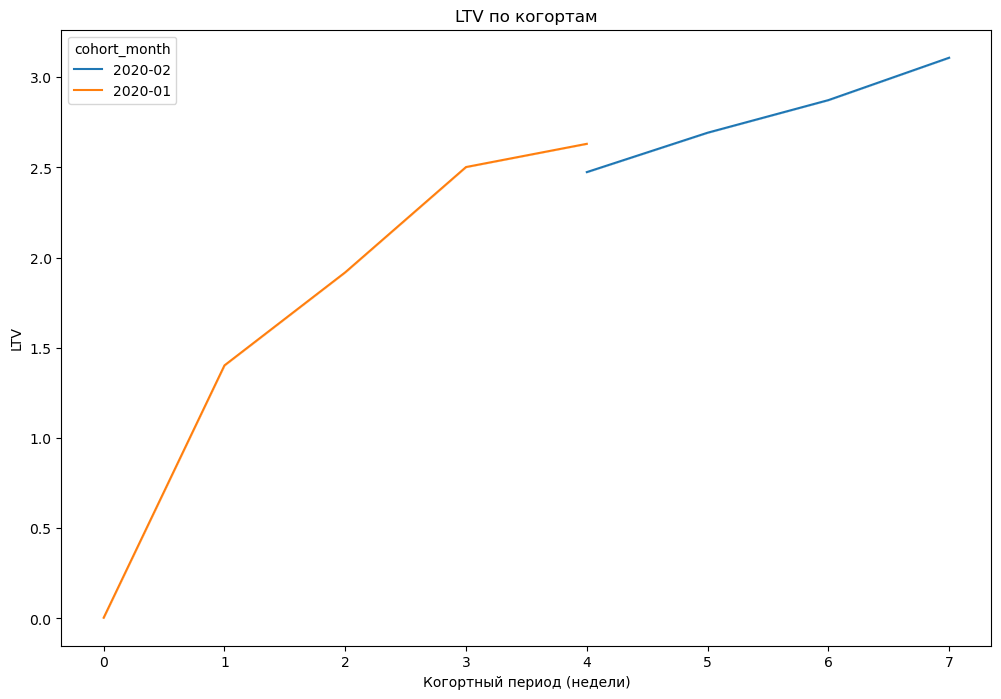

In [16]:
# Построение графика LTV
plt.figure(figsize=(12, 8))
sns.lineplot(x='cohort_period', y='ltv', hue='cohort_month', data=df)
plt.title('LTV по когортам')
plt.xlabel('Когортный период (недели)')
plt.ylabel('LTV')
plt.show()

### Прогноз LTV на полгода


Приступим к выполнению следующего задания в соответствии с ТЗ:

**2. Спрогнозировать, каким будет LTV на полгода.**

Прогнозирование LTV представляет из себя сложную задачу, так как необходимо учитывать множество факторов.
Ввиду того что в нашем датасете представлено не так много данных, воспользуемся одним из самых простых способов прогнозирования LTV - использование среднего значения на основе исторических данных.

In [24]:
# Рассчитаем средний LTV за предыдущие периоды
avg_ltv = df['ltv'].mean()

# Прогноз LTV на полгода
forecast_steps = 6
forecast_ltv = [avg_ltv] * forecast_steps  # Предполагаем полгода

display("Прогноз LTV на полгода:", forecast_ltv)

'Прогноз LTV на полгода:'

[2.2382304303968783,
 2.2382304303968783,
 2.2382304303968783,
 2.2382304303968783,
 2.2382304303968783,
 2.2382304303968783]

На основе среднего значения можно сделать прогноз, что LTV снизится в следующие полгода.

### Визуализация LTV

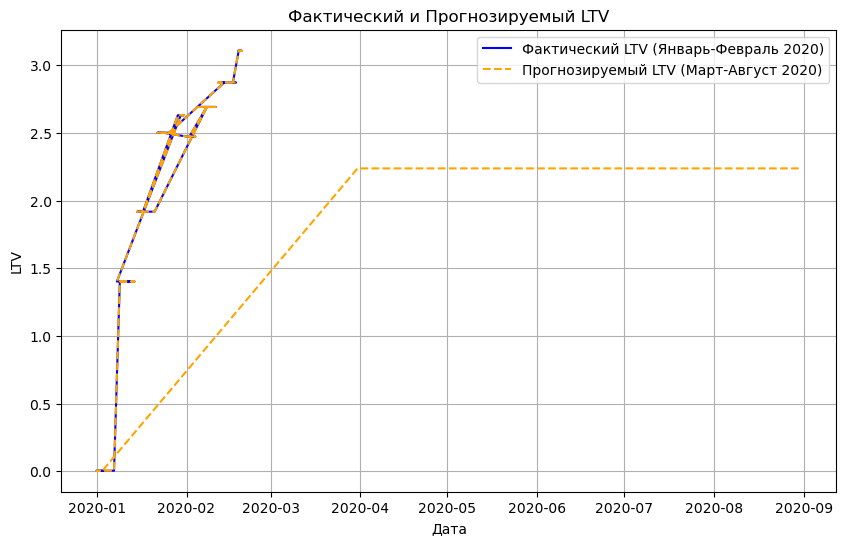

In [17]:
# Рассчитаем средний LTV за предыдущие периоды
avg_ltv = df['ltv'].mean()

# Прогноз LTV на полгода
forecast_steps = 6
forecast_ltv = [avg_ltv] * forecast_steps  # Предполагаем полгода

# Определяем начальную дату для прогноза (март 2020)
start_date = pd.to_datetime('2020-03-01')
forecast_dates = pd.date_range(start_date, periods=forecast_steps, freq='M')

# Добавляем прогноз в DataFrame
forecast_df = pd.DataFrame({'purchase_date': forecast_dates, 'ltv': forecast_ltv})
df_forecast = pd.concat([df, forecast_df])

# Построение графика
plt.figure(figsize=(10, 6))

# Фактический LTV (январь 2020 - февраль 2020)
plt.plot(df['purchase_date'], df['ltv'], label='Фактический LTV (Январь-Февраль 2020)', color='blue')

# Прогнозируемый LTV (март 2020 - август 2020)
plt.plot(df_forecast['purchase_date'], df_forecast['ltv'], label='Прогнозируемый LTV (Март-Август 2020)', linestyle='dashed', color='orange')

# Настройка графика
plt.title('Фактический и Прогнозируемый LTV')
plt.xlabel('Дата')
plt.ylabel('LTV')
plt.legend()
plt.grid(True)
plt.show()

### Расчёт ROMI

**В соответствии с ТЗ необходимо: Рассчитать ROMI на 4 недели и на полгода, если стоимость привлечения платящего пользователя 6 USD (ROMI нужно брать операционный, а не бухгалтерский, цель: узнать как окупятся наши инвестиции).**

ROMI (Return on Marketing Investment) рассчитывается как отношение прибыли к затратам на маркетинг.

In [18]:
# Затраты на маркетинг
marketing_costs = 6  # USD

# Фактический LTV
actual_ltv = df['ltv'].mean()

# Количество платящих пользователей (предположим, что это среднее количество пользователей за период)
paying_users = df['user_id'].nunique()

# Расчет ROMI на 4 недели
romi_4_weeks = ((actual_ltv * paying_users) - marketing_costs) / marketing_costs

# Расчет ROMI на полгода
romi_6_months = ((actual_ltv * paying_users * 26/4) - marketing_costs) / marketing_costs  # Предполагаем 4 недели в месяце

print(f"ROMI на 4 недели: {romi_4_weeks:.2f}")
print(f"ROMI на полгода: {romi_6_months:.2f}")

ROMI на 4 недели: 23466.47
ROMI на полгода: 152537.57


## Общие выводы по исследованию

**В результате работы с данными были получены следующие результаты:**
1) Выполнена предобработка данных, а именно:
- Датасет проверен на соответствие форматов данных;  
- Датасет проверен на пропуски. Пропущенных значений не обнаружено;   
- Датасет проверен на дубликаты, выявлено 84 явных дубликата. Дубликаты были удалены, процент потерь  составил 0.07%.

2) Произведен расчёт LTV пользователей приложения используя когортный анализ, прирост LTV также отображен на линейном графике;  
3) Произведен прогнозный расчёт LTV на полгода(до августа 2020) с использованием среднего значения LTV на основе исторических данных;  
4) Построен график на котором отображен текущий LTV и прогнозный LTV;  
5) Расчитан ROMI (Return on Marketing Investment) на 4 недели и полгода.  